In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns 

In [5]:
df = pd.read_excel('RC+Health+Care+Data-20180820.xlsx')

In [6]:
pd.set_option('display.max_columns', 40)
df.head()

,id,Age (y),"Gender(1, male; 2, female)",site,height(cm),weight(kg),BMI(kg/m2),SBP(mmHg),DBP(mmHg),FPG (mmol/L),Cholesterol(mmol/L),Triglyceride(mmol/L),HDL-c(mmol/L),LDL(mmol/L),ALT(U/L),AST(U/L),BUN(mmol/L),CCR(umol/L),FPG of final visit(mmol/L),"Diabetes diagnosed during followup（1,Yes）","censor of diabetes at followup(1, Yes; 0, No)",year of followup,"smoking status(1,current smoker;2, ever smoker;3,never smoker)","drinking status(1,current drinker;2, ever drinker;3,never drinker)","family histroy of diabetes(1,Yes;0,No)"
0,1,43,2,16,166.4,53.5,19.3,96.0,57.0,4.99,5.13,0.78,NaN,NaN,10.0,NaN,3.08,50.3,4.97,NaN,0,2.151951,3.0,3.0,1
1,2,34,1,2,169.0,57.0,20.0,124.0,69.0,3.51,4.61,1.75,1.09,3.13,29.1,NaN,6.13,83.7,5.50,NaN,0,3.969884,NaN,NaN,0
2,3,32,2,2,157.0,51.0,20.7,98.0,68.0,4.25,4.73,0.47,NaN,NaN,6.9,19.5,4.45,42.8,4.90,NaN,0,3.939767,NaN,NaN,0
3,11,59,1,2,165.0,63.0,23.1,136.0,73.0,5.70,4.50,0.75,1.53,2.80,15.0,NaN,5.76,62.6,5.50,NaN,0,2.184805,3.0,3.0,0
4,14,30,2,9,163.5,48.5,18.1,107.0,76.0,4.42,3.48,0.52,1.55,1.43,12.0,19.9,2.51,48.9,4.82,NaN,0,2.026010,NaN,NaN,0


In [7]:
df.drop(columns = ['site', 'year of followup', 'Diabetes diagnosed during followup（1,Yes）'], inplace = True)

In [5]:
df.head()

,id,Age (y),"Gender(1, male; 2, female)",height(cm),weight(kg),BMI(kg/m2),SBP(mmHg),DBP(mmHg),FPG (mmol/L),Cholesterol(mmol/L),Triglyceride(mmol/L),HDL-c(mmol/L),LDL(mmol/L),ALT(U/L),AST(U/L),BUN(mmol/L),CCR(umol/L),FPG of final visit(mmol/L),"censor of diabetes at followup(1, Yes; 0, No)","smoking status(1,current smoker;2, ever smoker;3,never smoker)","drinking status(1,current drinker;2, ever drinker;3,never drinker)","family histroy of diabetes(1,Yes;0,No)"
0,1,43,2,166.4,53.5,19.3,96.0,57.0,4.99,5.13,0.78,NaN,NaN,10.0,NaN,3.08,50.3,4.97,0,3.0,3.0,1
1,2,34,1,169.0,57.0,20.0,124.0,69.0,3.51,4.61,1.75,1.09,3.13,29.1,NaN,6.13,83.7,5.50,0,NaN,NaN,0
2,3,32,2,157.0,51.0,20.7,98.0,68.0,4.25,4.73,0.47,NaN,NaN,6.9,19.5,4.45,42.8,4.90,0,NaN,NaN,0
3,11,59,1,165.0,63.0,23.1,136.0,73.0,5.70,4.50,0.75,1.53,2.80,15.0,NaN,5.76,62.6,5.50,0,3.0,3.0,0
4,14,30,2,163.5,48.5,18.1,107.0,76.0,4.42,3.48,0.52,1.55,1.43,12.0,19.9,2.51,48.9,4.82,0,NaN,NaN,0


In [8]:
df.rename(columns = {'Gender(1, male; 2, female)': 'Gender', 'censor of diabetes at followup(1, Yes; 0, No)' : 'Diabetes', 'smoking status(1,current smoker;2, ever smoker;3,never smoker)' : 'smoking_status', 'drinking status(1,current drinker;2, ever drinker;3,never drinker)' : 'Drinking_status', 'Age (y)' : 'Age', 'FPG of final visit(mmol/L)':'FFPG (mmol/L)' }, inplace = True)

In [7]:
df.head()

,id,Age,Gender,height(cm),weight(kg),BMI(kg/m2),SBP(mmHg),DBP(mmHg),FPG (mmol/L),Cholesterol(mmol/L),Triglyceride(mmol/L),HDL-c(mmol/L),LDL(mmol/L),ALT(U/L),AST(U/L),BUN(mmol/L),CCR(umol/L),FFPG (mmol/L),Diabetes,smoking_status,Drinking_status,"family histroy of diabetes(1,Yes;0,No)"
0,1,43,2,166.4,53.5,19.3,96.0,57.0,4.99,5.13,0.78,NaN,NaN,10.0,NaN,3.08,50.3,4.97,0,3.0,3.0,1
1,2,34,1,169.0,57.0,20.0,124.0,69.0,3.51,4.61,1.75,1.09,3.13,29.1,NaN,6.13,83.7,5.50,0,NaN,NaN,0
2,3,32,2,157.0,51.0,20.7,98.0,68.0,4.25,4.73,0.47,NaN,NaN,6.9,19.5,4.45,42.8,4.90,0,NaN,NaN,0
3,11,59,1,165.0,63.0,23.1,136.0,73.0,5.70,4.50,0.75,1.53,2.80,15.0,NaN,5.76,62.6,5.50,0,3.0,3.0,0
4,14,30,2,163.5,48.5,18.1,107.0,76.0,4.42,3.48,0.52,1.55,1.43,12.0,19.9,2.51,48.9,4.82,0,NaN,NaN,0


In [9]:
df_Diabetes = df[['BMI(kg/m2)', 'FFPG (mmol/L)', 'FPG (mmol/L)', 'Age', 'HDL-c(mmol/L)', 'LDL(mmol/L)', 'smoking_status', 'Drinking_status', 'Diabetes']]

In [9]:
df_Diabetes.isna().sum()

BMI(kg/m2)              0
FFPG (mmol/L)          19
FPG (mmol/L)            0
Age                     0
HDL-c(mmol/L)       94562
LDL(mmol/L)         93421
smoking_status     151603
Drinking_status    151603
Diabetes                0
dtype: int64

In [10]:
df_Diabetes.dropna(subset = ['Drinking_status', 'smoking_status'], inplace = True)

C:\Users\Nidou\AppData\Local\Temp\ipykernel_32748\2248615051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Diabetes.dropna(subset = ['Drinking_status', 'smoking_status'], inplace = True)


In [24]:
df_Diabetes.isna().sum()

BMI(kg/m2)         0
FFPG (mmol/L)      0
FPG (mmol/L)       0
Age                0
HDL-c(mmol/L)      0
LDL(mmol/L)        0
smoking_status     0
Drinking_status    0
Diabetes           0
dtype: int64

<Axes: >

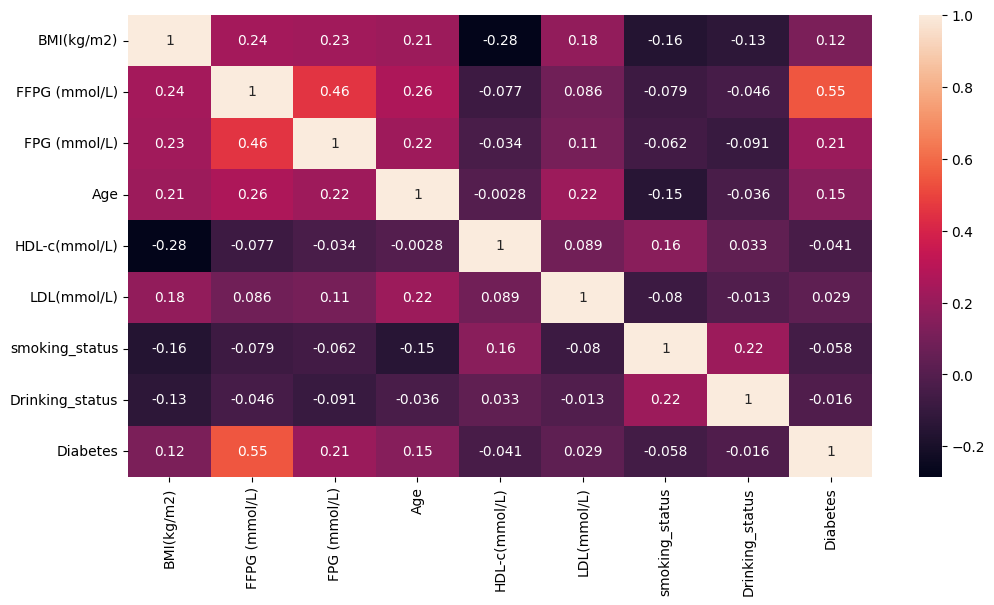

In [12]:
df_Diabetes.corr()
plt.figure(figsize = (12,6))
sns.heatmap(df_Diabetes.corr(), annot = True)

In [12]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
df_Diabetes[['HDL-c(mmol/L)', 'LDL(mmol/L)']] = imputer.fit_transform(df_Diabetes[['HDL-c(mmol/L)', 'LDL(mmol/L)']])

C:\Users\Nidou\AppData\Local\Temp\ipykernel_32748\264765773.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Diabetes[['HDL-c(mmol/L)', 'LDL(mmol/L)']] = imputer.fit_transform(df_Diabetes[['HDL-c(mmol/L)', 'LDL(mmol/L)']])


In [13]:
df['PatientID'] = ['P' + str(i).zfill(6) for i in range(1, len(df) + 1)]

In [14]:
df_Diabetes.isnull().sum()

BMI(kg/m2)          0
FFPG (mmol/L)      10
FPG (mmol/L)        0
Age                 0
HDL-c(mmol/L)       0
LDL(mmol/L)         0
smoking_status      0
Drinking_status     0
Diabetes            0
dtype: int64

In [15]:
df_Diabetes.dropna(subset = ['FFPG (mmol/L)'], inplace= True)

C:\Users\Nidou\AppData\Local\Temp\ipykernel_32748\2592480887.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Diabetes.dropna(subset = ['FFPG (mmol/L)'], inplace= True)


In [16]:
df_Diabetes.isnull().sum()

BMI(kg/m2)         0
FFPG (mmol/L)      0
FPG (mmol/L)       0
Age                0
HDL-c(mmol/L)      0
LDL(mmol/L)        0
smoking_status     0
Drinking_status    0
Diabetes           0
dtype: int64

In [17]:
df_Diabetes['Diabetes'].value_counts()

Diabetes
0    59058
1     1162
Name: count, dtype: int64

<Axes: xlabel='Diabetes', ylabel='Count'>

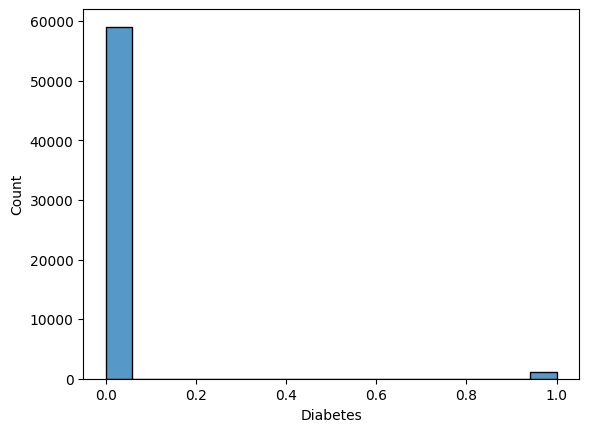

In [23]:
sns.histplot(data = df_Diabetes['Diabetes'])

In [24]:
df_Diabetes.describe()

,BMI(kg/m2),FFPG (mmol/L),FPG (mmol/L),Age,HDL-c(mmol/L),LDL(mmol/L),smoking_status,Drinking_status,Diabetes
count,60220.000000,60220.000000,60220.000000,60220.000000,60220.000000,60220.000000,60220.000000,60220.000000,60220.000000
mean,23.397205,5.172208,4.962617,41.472617,1.336792,2.742720,2.556543,2.806426,0.019296
std,3.341682,0.654368,0.622478,12.542765,0.227376,0.512659,0.804846,0.448302,0.137564
min,15.000000,3.250000,0.590000,20.000000,0.000000,0.010000,1.000000,1.000000,0.000000
25%,20.900000,4.800000,4.570000,32.000000,1.280000,2.600000,3.000000,3.000000,0.000000
50%,23.200000,5.100000,4.970000,38.000000,1.336422,2.742818,3.000000,3.000000,0.000000
75%,25.500000,5.420000,5.350000,49.000000,1.350000,2.770000,3.000000,3.000000,0.000000
max,46.300000,20.600000,6.990000,95.000000,10.400000,9.310000,3.000000,3.000000,1.000000


In [18]:
df_Diabetes.loc[df_Diabetes['Drinking_status'] == 3, 'Drinking_status'] = -1
df_Diabetes.loc[df_Diabetes['smoking_status'] == 3, 'smoking_status'] = -1

In [19]:
df_Diabetes.loc[df_Diabetes['Drinking_status'] == 2, 'Drinking_status'] = 0
df_Diabetes.loc[df_Diabetes['smoking_status'] == 2, 'smoking_status'] = 0

In [27]:
df_Diabetes.describe()

,BMI(kg/m2),FFPG (mmol/L),FPG (mmol/L),Age,HDL-c(mmol/L),LDL(mmol/L),smoking_status,Drinking_status,Diabetes
count,60220.000000,60220.000000,60220.000000,60220.000000,60220.000000,60220.000000,60220.000000,60220.000000,60220.000000
mean,23.397205,5.172208,4.962617,41.472617,1.336792,2.742720,-0.556543,-0.806426,0.019296
std,3.341682,0.654368,0.622478,12.542765,0.227376,0.512659,0.804846,0.448302,0.137564
min,15.000000,3.250000,0.590000,20.000000,0.000000,0.010000,-1.000000,-1.000000,0.000000
25%,20.900000,4.800000,4.570000,32.000000,1.280000,2.600000,-1.000000,-1.000000,0.000000
50%,23.200000,5.100000,4.970000,38.000000,1.336422,2.742818,-1.000000,-1.000000,0.000000
75%,25.500000,5.420000,5.350000,49.000000,1.350000,2.770000,-1.000000,-1.000000,0.000000
max,46.300000,20.600000,6.990000,95.000000,10.400000,9.310000,1.000000,1.000000,1.000000


In [28]:
from sklearn.preprocessing import StandardScaler
cols_to_normalize = ['BMI(kg/m2)', 'FFPG (mmol/L)', 'FPG (mmol/L)', 'Age', 'HDL-c(mmol/L)', 'LDL(mmol/L)']

scaler = StandardScaler()
df_Diabetes[cols_to_normalize] = scaler.fit_transform(df_Diabetes[cols_to_normalize])

C:\Users\Nidou\AppData\Local\Temp\ipykernel_85236\3143764518.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_Diabetes[cols_to_normalize] = scaler.fit_transform(df_Diabetes[cols_to_normalize])


In [29]:
df_Diabetes.describe()

,BMI(kg/m2),FFPG (mmol/L),FPG (mmol/L),Age,HDL-c(mmol/L),LDL(mmol/L),smoking_status,Drinking_status,Diabetes
count,6.022000e+04,6.022000e+04,6.022000e+04,6.022000e+04,6.022000e+04,6.022000e+04,60220.000000,60220.000000,60220.000000
mean,1.157493e-16,6.087164e-16,-1.278316e-15,-4.229983e-17,-1.345099e-16,8.634593e-16,-0.556543,-0.806426,0.019296
std,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,1.000008e+00,0.804846,0.448302,0.137564
min,-2.512889e+00,-2.937527e+00,-7.024595e+00,-1.711967e+00,-5.879258e+00,-5.330523e+00,-1.000000,-1.000000,0.000000
25%,-7.472962e-01,-5.688099e-01,-6.307380e-01,-7.552319e-01,-2.497722e-01,-2.783944e-01,-1.000000,-1.000000,0.000000
50%,-5.901431e-02,-1.103485e-01,1.186065e-02,-2.768645e-01,-1.625416e-03,1.897673e-04,-1.000000,-1.000000,0.000000
75%,6.292675e-01,3.786771e-01,6.223294e-01,6.001424e-01,5.809026e-02,5.321254e-02,-1.000000,-1.000000,0.000000
max,6.853730e+00,2.357683e+01,3.256984e+00,4.267626e+00,3.986031e+01,1.281033e+01,1.000000,1.000000,1.000000


In [20]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(df_Diabetes.drop('Diabetes', axis=1), df_Diabetes['Diabetes'])
df_Diabetes = X_smote.copy()
df_Diabetes['Diabetes'] = y_smote
X_smote, y_smote = smote.fit_resample(df_Diabetes.drop('Diabetes', axis=1), df_Diabetes['Diabetes'])

<Axes: xlabel='Diabetes', ylabel='Count'>

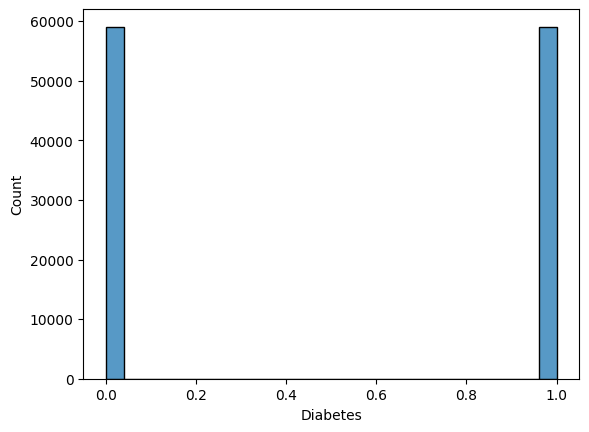

In [21]:
sns.histplot(data = df_Diabetes['Diabetes'])

In [25]:
df_Diabetes.describe()

,BMI(kg/m2),FFPG (mmol/L),FPG (mmol/L),Age,HDL-c(mmol/L),LDL(mmol/L),smoking_status,Drinking_status,Diabetes
count,118116.000000,118116.000000,118116.000000,118116.000000,118116.000000,118116.000000,118116.000000,118116.000000,118116.000000
mean,24.782381,6.398650,5.435730,47.811109,1.309687,2.777662,-0.403752,-0.792020,0.500000
std,3.565843,1.672547,0.788695,14.286835,0.230144,0.481156,0.865404,0.441894,0.500002
min,15.000000,3.250000,0.590000,20.000000,0.000000,0.010000,-1.000000,-1.000000,0.000000
25%,22.318282,5.080000,4.870000,35.000000,1.215325,2.622814,-1.000000,-1.000000,0.000000
50%,24.700000,5.950000,5.410000,46.000000,1.336412,2.742906,-1.000000,-1.000000,0.500000
75%,27.100000,7.386853,6.090000,59.000000,1.344109,2.910000,0.759725,-1.000000,1.000000
max,46.300000,20.600000,6.990000,95.000000,10.400000,9.310000,1.000000,1.000000,1.000000


In [26]:
df_Diabetes.to_csv('clean_diabetes.csv', index=False)

In [ ]:
from sklearn.model_selection import train_test_split

X = df_Diabetes.drop('Diabetes', axis = 1)
y = df_Diabetes['Diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3,random_state= 42)


In [ ]:
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)